In [1]:
from polymorph_s2df.devutils import *
from polymorph_num import ops
from polymorph_sketch.draw_api import draw, loss, distance_param, angle_param, point_param, debug_inner_node, real_param

p0 (0.0, 0.0)
p1 (-4.371135631231482e-08, 0.9999992847442627)
p2 (1.1999993324279785, 0.9999992847442627)
p3 (5.960464477539062e-07, 0.999999463558197)
---
p0-p1 0.9999992847442627
p1-p2 1.1999993324279785
p2-p3 1.1999987363815308
p3-p0 0.999999463558197
---
p0^p1 90.0
p1^p2 0.0
p2^p3 179.99998474121094
p3^p0 -90.00003051757812


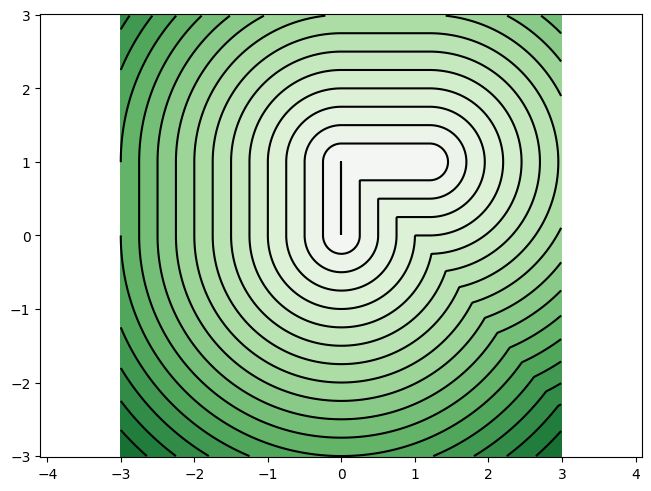

In [9]:
d = draw()
p0 = d.current_point
p1 = d.line().move_by_polar(90, distance_param()).current_point
p2 = d.line().horizontal_move_by(real_param()).current_point
p3 = d.line().move_by_polar(angle_param(), distance_param()).current_point
shape = d.line().close()

sketch = (
    loss()
    .fit_distance((p1 - p0).norm(), 1)
    .fit_distance((p2 - p1).norm(), 1.2)
    .fit_distance((p2 - p3).norm(), 1.2)
    .fit_angle((p3 - p2).direction(), 270)
    .create_sketch()
)

sketch.add_shape(shape)

print("p0", sketch.debug(p0))
print("p1", sketch.debug(p1))
print("p2", sketch.debug(p2))
print("p3", sketch.debug(p3))

print("---")

print("p0-p1", sketch.debug((p0 - p1).norm()))
print("p1-p2", sketch.debug((p2 - p1).norm()))
print("p2-p3", sketch.debug((p2 - p3).norm()))
print("p3-p0", sketch.debug((p0 - p3).norm()))

print("---")

print("p0^p1", sketch.debug((p1 - p0).direction()))
print("p1^p2", sketch.debug((p2 - p1).direction()))
print("p2^p3", sketch.debug((p3 - p2).direction()))
print("p3^p0", sketch.debug((p0 - p3).direction()))


sketch.plot()

